<a href="https://colab.research.google.com/github/Shubham07102003/Celebal-summer-internship-2025/blob/main/WEEK-6/Model_Evaluation_and_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Assignment-6
# Name: Shubham
# Student Id: CT_CSI_DS_4356

In [ ]:
# @title 1. Introduction
This notebook demonstrates the process of training multiple machine learning models,
evaluating their performance using accuracy, precision, recall, and F1-score,
and optimizing their hyperparameters using GridSearchCV and RandomizedSearchCV.
The heart disease dataset is used to classify the presence of heart disease in patients


In [1]:
# @title 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [2]:
# @title 3. Load and Explore Data
# Load the dataset
df = pd.read_csv('/content/heart-disease.csv')

# Display first few rows
df.head()

# Check for missing values and data types
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [3]:
# @title 4. Data Preprocessing
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [4]:
# @title 5. Baseline Model Training & Evaluation


In [5]:
# @title 5.1 Define Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}


In [6]:
# @title 5.2 Train and Evaluate
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1])
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")



--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion Matrix:
 [[19  9]
 [ 3 30]]


--- KNN ---
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion Matrix:
 [[19  9]
 [ 3 30]]


--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.70      0.79      0.74        33

    accuracy                           0

In [7]:
# @title 5.3 Results Table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df.set_index('Model', inplace=True)
results_df


,Accuracy,Precision,Recall,F1-Score
Model,,,,
Logistic Regression,0.803279,0.769231,0.909091,0.833333
KNN,0.803279,0.769231,0.909091,0.833333
Decision Tree,0.704918,0.702703,0.787879,0.742857
Random Forest,0.836066,0.780488,0.969697,0.864865
SVM,0.819672,0.775000,0.939394,0.849315


In [8]:
# @title 6. Hyperparameter Tuning


In [9]:
# @title 6.1 GridSearchCV: Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='f1')
grid_lr.fit(X_train_scaled, y_train)

print("Best Params:", grid_lr.best_params_)
print("Best F1 Score:", grid_lr.best_score_)



Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 Score: 0.8620791826309068


In [10]:
# @title 6.2 RandomizedSearchCV: Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rand_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf,
                             n_iter=20, cv=5, scoring='f1', random_state=42, n_jobs=-1)
rand_rf.fit(X_train_scaled, y_train)

print("Best Params:", rand_rf.best_params_)
print("Best F1 Score:", rand_rf.best_score_)


Best Params: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'bootstrap': False}
Best F1 Score: 0.8605269000087006


In [11]:
# @title 6.3 GridSearchCV: SVM
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=5, scoring='f1')
grid_svc.fit(X_train_scaled, y_train)

print("Best Params:", grid_svc.best_params_)
print("Best F1 Score:", grid_svc.best_score_)


Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.8599533799533798


In [12]:
# @title 7. Evaluate Tuned Models
# Logistic Regression
y_pred_lr = grid_lr.best_estimator_.predict(X_test_scaled)
lr_metrics = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_lr)
]

# Random Forest
y_pred_rf = rand_rf.best_estimator_.predict(X_test_scaled)
rf_metrics = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]

# SVM
y_pred_svc = grid_svc.best_estimator_.predict(X_test_scaled)
svc_metrics = [
    accuracy_score(y_test, y_pred_svc),
    precision_score(y_test, y_pred_svc),
    recall_score(y_test, y_pred_svc),
    f1_score(y_test, y_pred_svc)
]

tuned_results = pd.DataFrame(
    [lr_metrics, rf_metrics, svc_metrics],
    columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    index=['Logistic Regression (Tuned)', 'Random Forest (Tuned)', 'SVM (Tuned)']
)
tuned_results



,Accuracy,Precision,Recall,F1-Score
Logistic Regression (Tuned),0.786885,0.750000,0.909091,0.821918
Random Forest (Tuned),0.803279,0.756098,0.939394,0.837838
SVM (Tuned),0.786885,0.750000,0.909091,0.821918


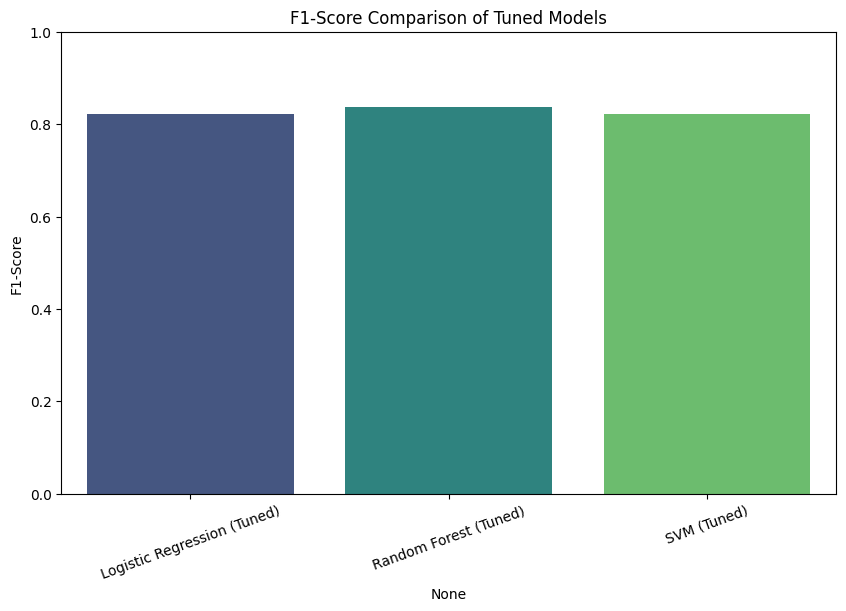

In [13]:
# @title 8. Visual Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=tuned_results.index, y=tuned_results['F1-Score'], palette='viridis')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison of Tuned Models')
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()


<Figure size 1000x600 with 0 Axes>

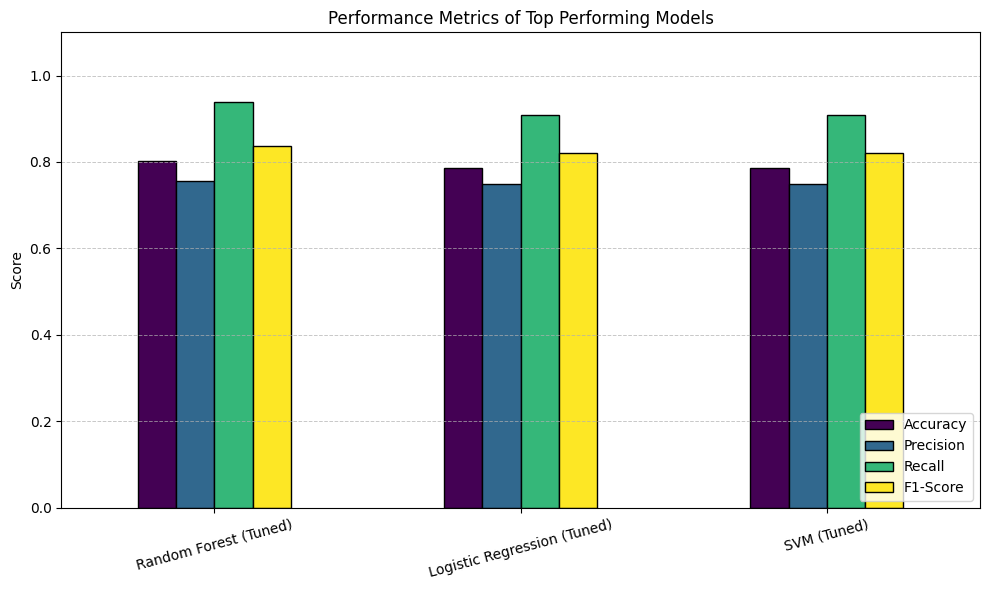

In [14]:
# @title Visualizing Best Performing Models
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top N models by F1-Score (e.g., top 3)
top_n = 3
top_models = tuned_results.sort_values('F1-Score', ascending=False).head(top_n)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(10, 6))
top_models[metrics].plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title('Performance Metrics of Top Performing Models')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()
